# Tiled Overlay

In [1]:
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from tqdm import tqdm

In [2]:
IMAGE_PATH = "/media/USB_disk/Dafni_lung_slide_scans/Human/21P00561-A4-002-M-less-PSR/collagen.ome.tiff"
RES_PATH = "/media/USB_disk/Dafni_lung_slide_scans/Human/21P00561-A4-002-M-less-PSR/res.csv"

In [3]:
image = tifffile.imread(IMAGE_PATH)
image.shape

(52371, 60408)

In [4]:
res = pd.read_csv(RES_PATH)
res

,x0,y0,x1,y1,collagen (px^2),tissue (px^2),collagen vs tissue (%)
0,4096,0,6144,2048,916240.0,1289302,71.064809
1,6144,0,8192,2048,890310.0,1391602,63.977344
2,8192,0,10240,2048,512052.0,1036250,49.413945
3,10240,0,12288,2048,877252.0,1503902,58.331726
4,12288,0,14336,2048,642291.0,1301702,49.342399
...,...,...,...,...,...,...,...
643,49152,49152,51200,51200,2029789.0,4194304,48.393941
644,51200,49152,53248,51200,2975742.0,4194304,70.947218
645,53248,49152,55296,51200,2345407.0,4194304,55.918860
646,55296,49152,57344,51200,2936780.0,4194304,70.018291


In [5]:
np.max(image)

1

Density measurement: 100%|██████████| 648/648 [00:07<00:00, 90.50it/s]


Text(0, 0.5, 'Collage Percentage (%)')

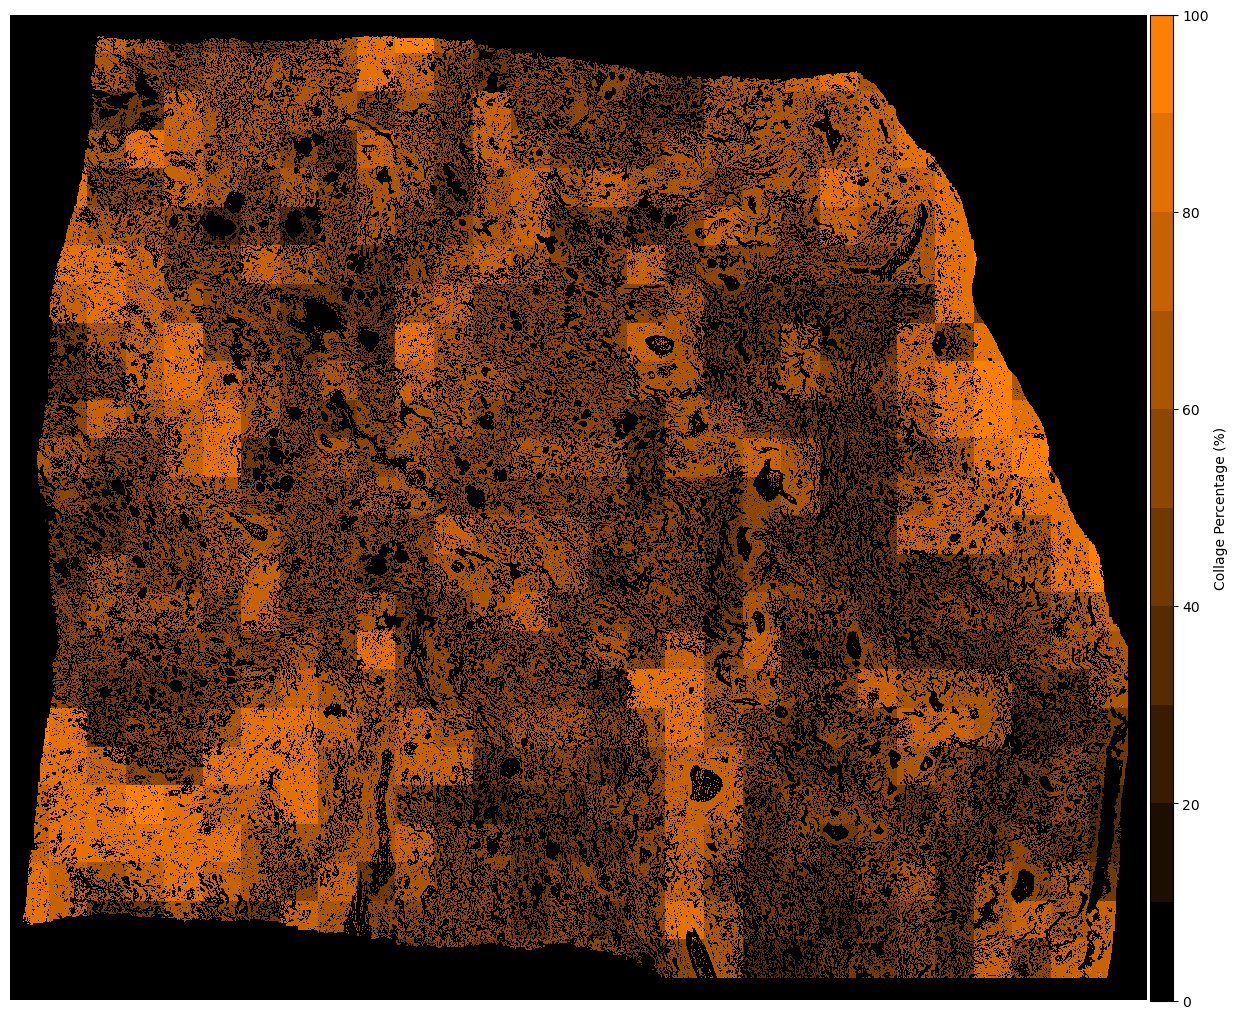

In [7]:
fig, axs = plt.subplots(1,1,figsize=(15,15))
image_density = np.copy(image).astype(np.uint8)
axs.set_axis_off()

# Create a rectangle patch
for idx, row in tqdm(res.iterrows(),total=len(res),desc="Density measurement"):
    x_min, y_min, width, height = int(row['x0']), int(row['y0']), int(row['x1']-row['x0']), int(row['y1']-row['y0'])

    # image_density[x_min:x_min+width,y_min:y_min+height] = image_density[x_min:x_min+width,y_min:y_min+height]*row["collagen vs tissue (%)"]
    image_density[y_min:y_min+height,x_min:x_min+width] = image_density[y_min:y_min+height,x_min:x_min+width]*row["collagen vs tissue (%)"]

    # if idx == 50:
    #     break

# Define your custom colors as RGB tuples
colors = [
    (0, (0, 0, 0)),
    (1/9, (1/9, 1/18, 0)),      
    (2/9, (2/9, 2/18, 0)),   
    (3/9, (3/9, 3/18, 0)),   
    (4/9, (4/9, 4/18, 0)),    
    (5/9, (5/9, 5/18, 0)),    
    (6/9, (6/9, 6/18, 0)),   
    (7/9, (7/9, 7/18, 0)),  
    (8/9, (8/9, 8/18, 0)),  
    (9/9, (9/9, 9/18, 0)) 
    ]  

positions = np.arange(0,101,10)

# Create a ListedColormap object with your custom colors
cmap = ListedColormap([color[1] for color in colors])
# cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

axs.imshow(image_density[::10,::10],cmap=cmap,vmin=0,vmax=100, interpolation="nearest")
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="2%", pad=0.03)
cbar = plt.colorbar(axs.get_images()[0], cax=cax)
cbar.ax.set_ylabel('Collage Percentage (%)', rotation=90)